<a href="https://colab.research.google.com/github/anoushka-r/stock-predictor/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#             to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [34]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [35]:
# Stock quotes
ticker = 'AAPL'
start_date = '2017-01-01'
end_date = '2024-06-01'
df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989265,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959055,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096153,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398228,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649181,134247600
...,...,...,...,...,...,...
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000


In [36]:
df.shape

(1865, 6)

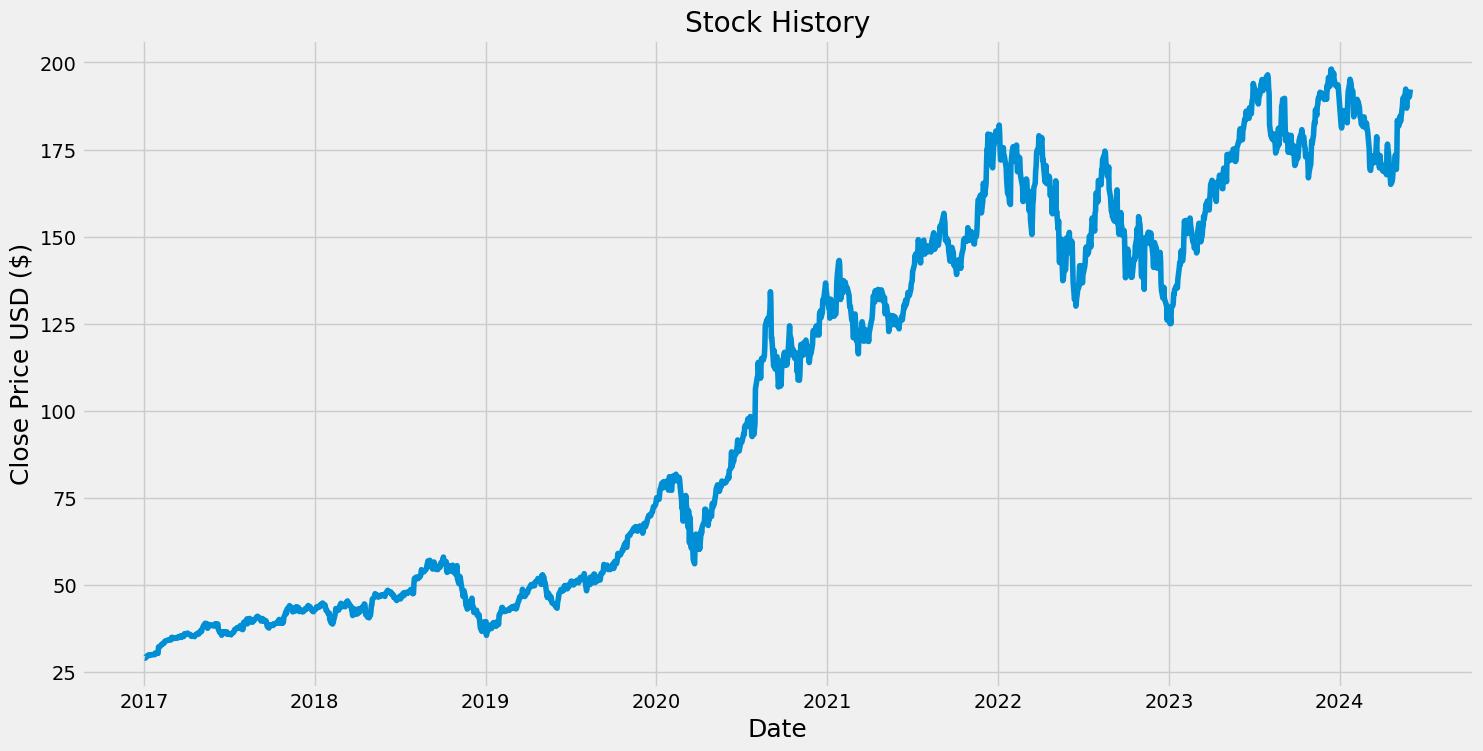

In [37]:
# Visualizing the previous stock prices
plt.figure(figsize=(16,8))
plt.title('Stock History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [38]:
data = df.filter(['Close'])
dataset = data.values
# Select the part of data to train the model
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len




1492

In [39]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[1.92195502e-04],
       [0.00000000e+00],
       [8.72244999e-04],
       ...,
       [9.53756499e-01],
       [9.59669985e-01],
       [9.65346970e-01]])

In [40]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]

x_train = [] # independant training features
y_train = [] # target variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i<=61:
    print('x_train\n',x_train)
    print('y_train\n', y_train)
    print()

x_train
 [array([0.0001922 , 0.        , 0.00087224, 0.00279413, 0.00439076,
       0.00456817, 0.00551433, 0.00477514, 0.00446469, 0.00588392,
       0.00586914, 0.00555868, 0.00588392, 0.0060022 , 0.00583957,
       0.00866326, 0.00875197, 0.00876674, 0.00829366, 0.00787972,
       0.01881967, 0.01849443, 0.01930754, 0.02109636, 0.02292954,
       0.02368351, 0.02424529, 0.02380178, 0.02553147, 0.02808907,
       0.02881346, 0.02857693, 0.02912392, 0.03057272, 0.03117886,
       0.0303214 , 0.0305136 , 0.03091274, 0.03100146, 0.03514088,
       0.03391386, 0.03512611, 0.03447562, 0.03474174, 0.03397298,
       0.03349989, 0.03417995, 0.03426865, 0.0339582 , 0.03613141,
       0.03647143, 0.03543658, 0.03760978, 0.03521481, 0.03755064,
       0.03681145, 0.03639751, 0.03675233, 0.04106917, 0.04154223])]
y_train
 [0.0412613402818775]

x_train
 [array([0.0001922 , 0.        , 0.00087224, 0.00279413, 0.00439076,
       0.00456817, 0.00551433, 0.00477514, 0.00446469, 0.00588392,
       0.

In [41]:
# Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1432, 60, 1)

In [43]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [45]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1432/1432 [==============================] - 41s 26ms/step - loss: 0.0019


In [46]:
# Creating the testing data set
# Creating a new array containing scaled values from index 1308 to 1634
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :] #all the values we want our model to predict
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [47]:
# Convert the data into numpy array
x_test = np.array(x_test)

In [48]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
# Get the model's predicted stock values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 14ms/step


In [50]:
# Get the root mean square (RMSE) (Accuracy of the model)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.757471444597308

<ipython-input-51-7478b99edf5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


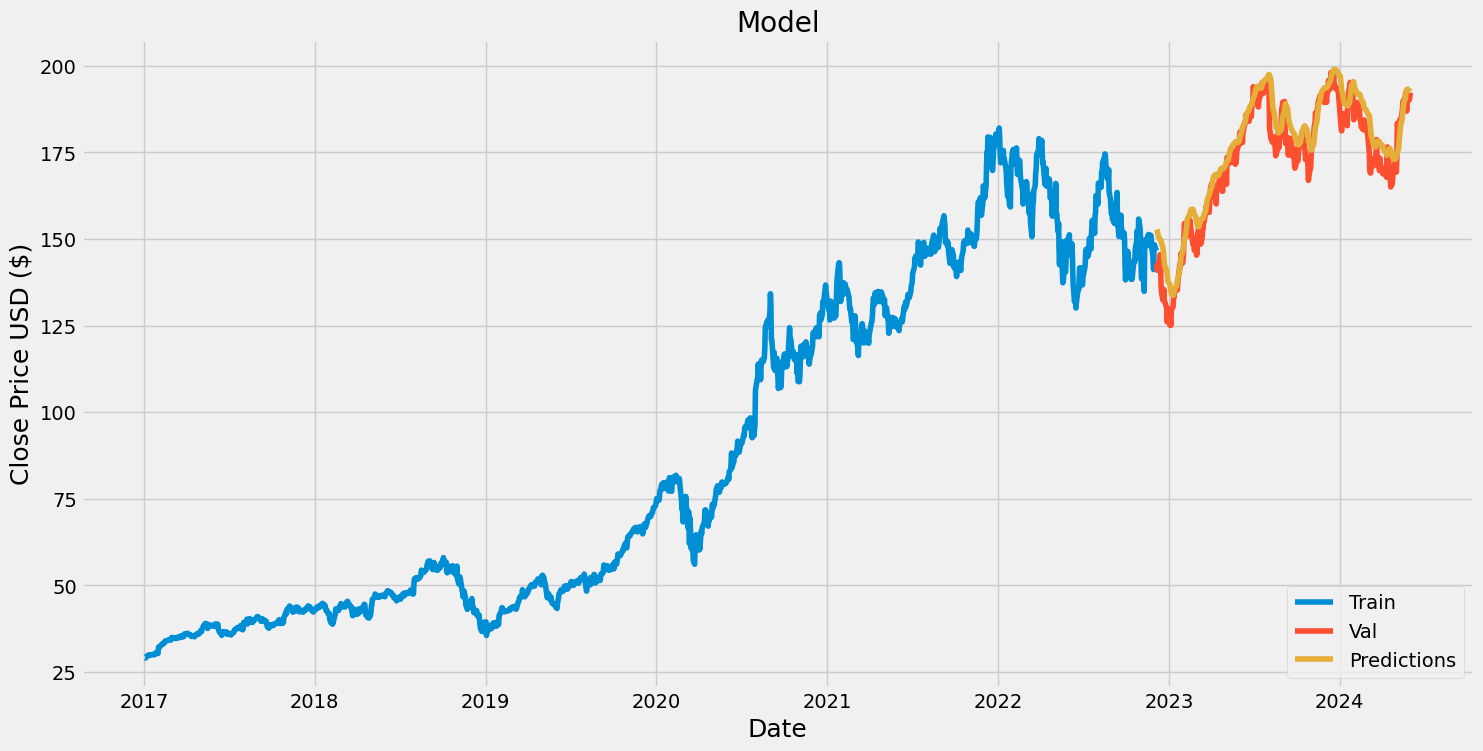

In [51]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
# Show the valid and the predicted prices
valid


,Close,Predictions
Date,,
2022-12-06,142.910004,152.773163
2022-12-07,140.940002,152.307144
2022-12-08,142.649994,151.519867
2022-12-09,142.160004,150.797958
2022-12-12,144.490005,150.118881
...,...,...
2024-05-24,189.979996,193.176361
2024-05-28,189.990005,193.279922
2024-05-29,190.289993,193.342758


In [66]:
# Get the quote
ticker_symbol = 'AAPL'
apple_quote =  yf.download(ticker_symbol, start='2017-01-01', end='2024-06-12')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 23ms/step
[[198.46991]]


In [70]:
ticker_symbol = 'AAPL'
apple_quote2 =  yf.download(ticker_symbol, start='2024-06-13', end='2024-06-14')
print(apple_quote2['Close'])


[*********************100%%**********************]  1 of 1 completed

Date
2024-06-13    214.240005
Name: Close, dtype: float64


In [72]:
# Future Predictions of the data
X_FUTURE = 100
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
  curr_prediction = model.predict(np.array([last]))
  print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = scaler.inverse_transform([predictions])[0]
print(predictions)

1/1 [==============================] - 0s 24ms/step
[[0.9730586]]
1/1 [==============================] - 0s 23ms/step
[[0.9753856]]
1/1 [==============================] - 0s 23ms/step
[[0.978386]]
1/1 [==============================] - 0s 26ms/step
[[0.9817447]]
1/1 [==============================] - 0s 25ms/step
[[0.98527974]]
1/1 [==============================] - 0s 28ms/step
[[0.98888564]]
1/1 [==============================] - 0s 25ms/step
[[0.9925021]]
1/1 [==============================] - 0s 43ms/step
[[0.9960941]]
1/1 [==============================] - 0s 24ms/step
[[0.99964195]]
1/1 [==============================] - 0s 23ms/step
[[1.0031338]]
1/1 [==============================] - 0s 24ms/step
[[1.0065632]]
1/1 [==============================] - 0s 25ms/step
[[1.0099261]]
1/1 [==============================] - 0s 26ms/step
[[1.0132205]]
1/1 [==============================] - 0s 26ms/step
[[1.0164452]]
1/1 [==============================] - 0s 25ms/step
[[1.0195993]]
1/1 [===

In [73]:
# Dataframe that contains the new prediction
import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")

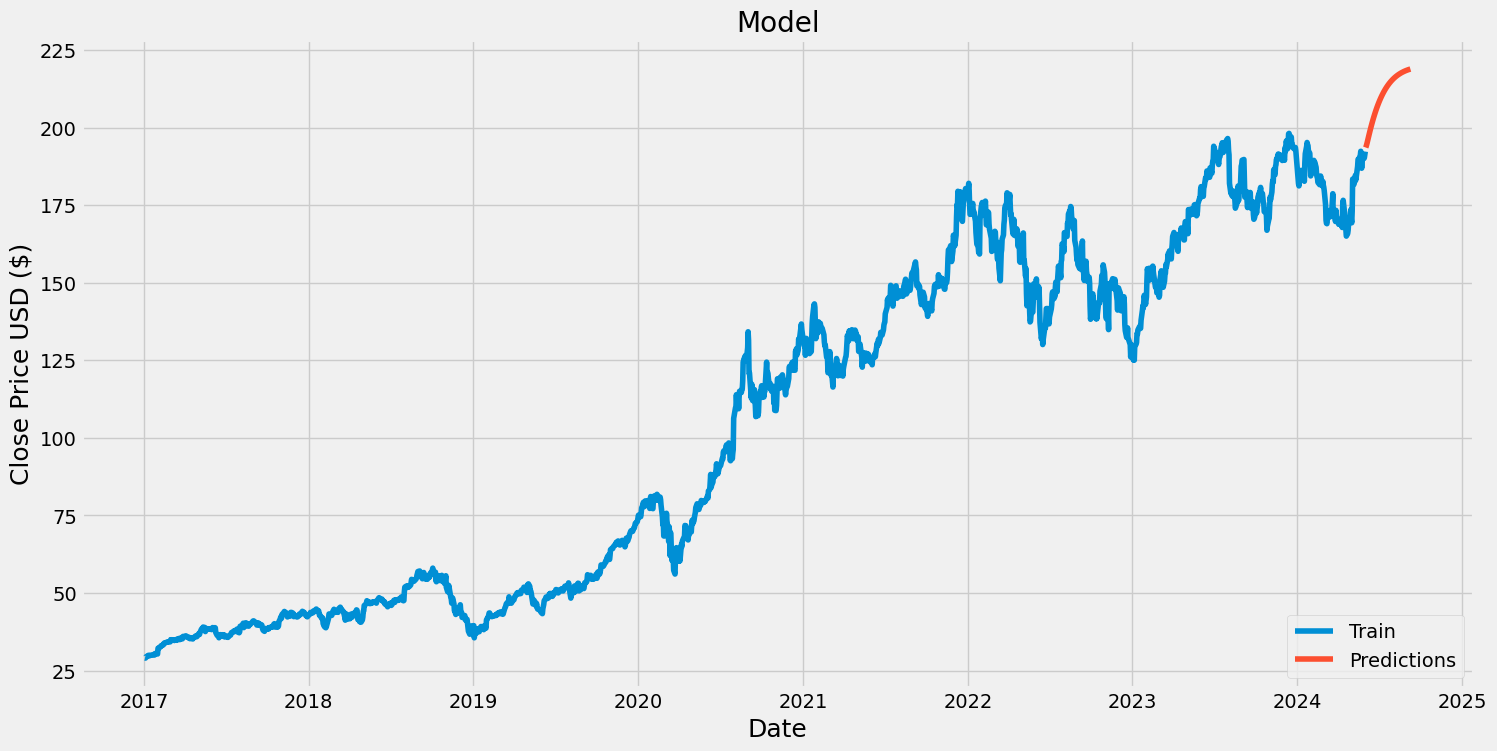

In [74]:
#Plot the data
train = data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(new_data['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()